<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1 文件資料的預處理 (Preprocessing)
文件資料的基本單位：
* 單字(word)
* 字元(characters)
  
在神經網路的訓練中，我們使用文件向量化(text vertorizing)來進行轉換

## 文件向量化 (text vectorizing)
1. 將文件資料分解為小單元(單字、字元或n元語法)
2. 經由一個字點對照表將token編碼成數值向量
3 進行one-hot-encodeing將token向量化
4. 將這些數據向量把包成序列張量送入神經網路  
![pic 6-1](https://raw.githubusercontent.com/hank199599/deep_learning_keras_log/main/pictures/6-1.png)

## one-hot encoding
  取得的向量是二進位、稀疏矩陣
1. 建立一個字典
2. 收錄到字典當作鍵(key)
3. 給每個鍵值唯一的整數作為鍵值(value)

#### 單字的one-hot encoding

In [2]:
import numpy as np

samples = ['The cat sat on the mat.','The dog eat my homework.']

token_index = {}

# 建立字典
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word]=len(token_index)+1

# 字典建立完成

max_length = 10

results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

print(results.shape)

for i,sample in enumerate(smaples):
  for j , word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1. # 把對應元素設為1

(2, 10, 11)


In [3]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

#### 字元的one-hot encoding

In [4]:
import string

samples = ['The cat sat on the mat.','The dog eat my homework.']
characters = string.printable
print(len(characters))

token_index = dict(zip(characters,range(1,len(characters)+1)))

# 字典建立完成

max_length = 50

results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

print(results.shape)

for i,sample in enumerate(smaples):
  for j , character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index] = 1. # 把對應元素設為1

100
(2, 50, 101)


In [5]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### 用Keras的內建工具 做 one-hot encoding

In [8]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.','The dog eat my homework.']

tokenizer = Tokenizer(num_words=1000) # 建立分類器，處理前1000個最常用的單字
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

print(sequences)

one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary')

print(one_hot_results.shape)
print(one_hot_results[0][:15]) # 第一個樣本的前15個
print(one_hot_results[1][:15]) # 第二個樣本的前15個

word_index = tokenizer.word_index
print('Found %s unique tokens'% len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
(2, 100)
[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
Found 9 unique tokens


#### 使用雜湊技巧做 one-hot encoding

In [9]:
samples = ['The cat sat on the mat.','The dog eat my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples),max_length,dimensionality))

for i ,smaple in enumerate(samples):
  for j,eord in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word))%dimensionality # 將token雜湊成0到1000之間的隨機整數索引
    results[i,j,index] = 1.

print(results.shape)

(2, 10, 1000)


## 文字崁入法 Word Embeddings
 低維度的浮點數向量
 * 從資料中學習向量的分類方式
 * 將更多資訊壓縮到更少的維度中

## 建立文字崁入向量的方法
 ① 使用Embdding layer   
 ② 直接套用其他機器學習以訓練好的文字崁入向量

### 用Keras 的 Embeddung Layer來實作文字崁入法


In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

建立 Embedding 層時,其權重(其token向量的內部字典)最初是隨機設定的、就如同任何其它層一樣。  
在訓練期間,這些文字向量通過反向傳播逐漸調整,建構出嵌入空間以供下游模型使用。  
一旦完成訓練,嵌入空間將學習出許多結構,

In [14]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features) # 將文字評論以整數(鍵值)list載入

print(x_train.shape)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
print(x_train.shape)

print(x_train[0])

x_test = preprocessing.sequence.pad_sequences(x_test,maxlen = maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

(25000,)
(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


#### 訓練模型

In [19]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6836 - acc: 0.5695 - val_loss: 0.6076 - val_acc: 0.6954
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5576 - acc: 0.7448 - val_loss: 0.5207 - val_acc: 0.7340
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4666 - acc: 0.7881 - val_loss: 0.4993 - 

In [28]:
# 驗證準確度: 約 74.66%
print(history.history['val_acc'][-1])

0.7477999925613403


#### 直接套用其他機器學習以訓練好的文字崁入向量  
使用前提：  
這些訓練好的崁入向量必須是**高度結構化**→涵蓋語言結構的普遍特性
* [Word2vec](https://code.google.com/archive/p/word2vec)
* [GloVe](https://nlp.stanford.edu/projects/glove)

## 自原始文字資料到文字崁入向量 [*本地端進行*]

### 下載[IMDB資料](https://ai.stanford.edu/~amaas/data/sentiment/)作為原始資料

In [1]:
import os

imdb_dir = './data/aclImdb'
train_dir=os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print(len(texts))

25000


#### 對資料進行向量化

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

maxlen = 100
training_smaples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('共使用了 %s 個token字詞' %len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

print('資料張量 shape:',data.shape)
print('標籤張量 shape:',labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_smaples]
y_train = labels[:training_smaples]
x_val = data[training_smaples:training_smaples+validation_samples]
y_val = labels[training_smaples:training_smaples+validation_samples]

共使用了 88582 個token字詞
資料張量 shape: (25000, 100)
標籤張量 shape: (25000,)


#### 下載 [GLOVE](https://nlp.stanford.edu/projects/glove/) 文字崁入向量
使用其中的100維數值向量做為所需要的資料


In [5]:
glove_dir = './data'

embeddings_index ={}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('共使用了 %s 個文字崁入向量' % len(embeddings_index))

共使用了 400000 個文字崁入向量


#### 準備 GloVe 文字嵌入向量矩陣

In [15]:
embedding_dim= 100

embedding_matrix = np.zeros((max_words,embedding_dim))

for word,i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_matrix[i] is not None:
            embedding_matrix[i] = embedding_vector

#### 模型定義

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# 參數 樣本數, 嵌入向量維度, 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('./model/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 258ms/step - loss: 0.6932 - acc: 0.4863 - val_loss: 0.6931 - val_acc: 0.5023
Epoch 2/10
7/7 [==============================] - 1s 210ms/step - loss: 0.6932 - acc: 0.4235 - val_loss: 0.6931 - val_acc: 0.4977
Epoch 3/10
7/7 [==============================] - 1s 212ms/step - loss: 0.6932 - acc: 0.4763 - val_loss: 0.6931 - val_acc: 0.4977
Epoch 4/10
7/7 [==============================] - 1s 208ms/step - loss: 0.6932 - acc: 0.5209 - val_loss: 0.6931 - val_acc: 0.5023
Epoch 5/10
7/7 [==============================] - 1s 209ms/step - loss: 0.6932 - acc: 0.4562 - val_loss: 0.6931 - val_acc: 0.5023
Epoch 6/10
7/7 [==============================] - 1s 205ms/step - loss: 0.6931 - acc: 0.5078 - val_loss: 0.6931 - val_acc: 0.5023
Epoch 7/10
7/7 [==============================] - 1s 213ms/step - loss: 0.6930 - acc: 0.5435 - val_loss: 0.6931 - val_acc: 0.5023
Epoch 8/10
7/7 [==============================] - 1s 209ms/step - loss: 0.6931 - acc: 0.52

#### 繪製結果

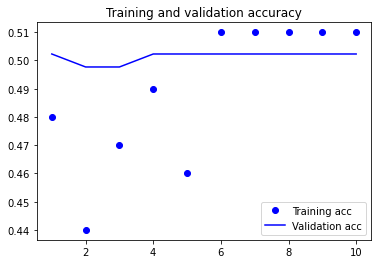

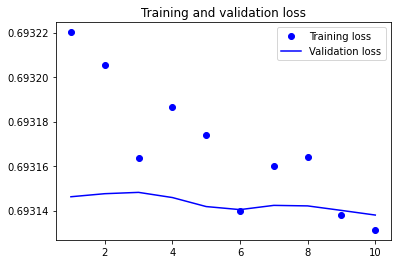

In [22]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc ,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss ,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

####  訓練相同模型而不使用預先訓練的文字嵌入向量

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 5s 661ms/step - loss: 0.6940 - acc: 0.5707 - val_loss: 0.6915 - val_acc: 0.5171
Epoch 2/10
7/7 [==============================] - 1s 222ms/step - loss: 0.5183 - acc: 0.9931 - val_loss: 0.6946 

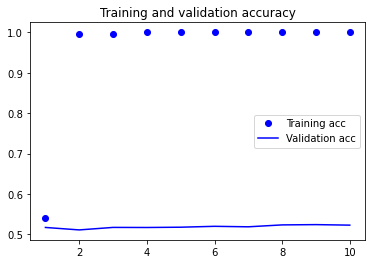

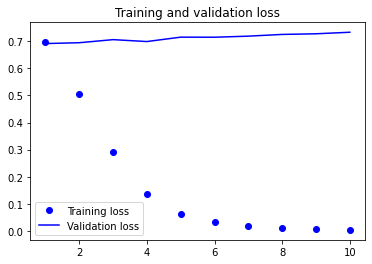

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


############### 繪製
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
	dir_name = os.path.join(test_dir, label_type)
	for fname in sorted(os.listdir(dir_name)):
		if fname[-4:] == '.txt':
			f = open(os.path.join(dir_name, fname), encoding='UTF-8')
			texts.append(f.read())
			f.close()
			if label_type == 'neg':
				labels.append(0)
			else:
				labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [ ]:
model.load_weights('./model/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

# 6-2 循環神經網路 RNN
* SimpleRNN
* LSTM
* GRU

#### 以 Numpy 實現簡單的 RNN

In [1]:
import numpy as np

timesteps = 100   # 輸入序列資料中的時間點數量
input_features = 32  # 輸入特徵空間的維度數
output_features = 64  # 輸出特徵空間的維度數

inputs = np.random.random((timesteps, input_features))  # 輸入資料：隨機產生數值以便示範

state_t = np.zeros((output_features, ))  # 初始狀態：全零向量

W = np.random.random((output_features, input_features))  # 建立隨機權重矩陣
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:  #  input_t 是個向量, shape 為 (input_features, )
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  # 結合輸入與當前狀態(前一個輸出)以取得當前輸出
    successive_outputs.append(output_t)  # 將此輸出儲存在列表中
    state_t = output_t  #更新下一個時間點的網絡狀態

final_output_sequence = np.concatenate(successive_outputs, axis=0)  
print(final_output_sequence.shape)


(6400,)


#### 準備 IMDB 資料

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  #考慮做為特徵的文字數量
maxlen = 500  # 我們只看每篇評論的前 500 個文字

batch_size = 32

print('讀取資料...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences') # 25000 筆訓練用序列資料 (評論)
print(len(input_test), 'test sequences')	# 25000 筆測試用序列資料

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) # 1. 只看每篇評論的前 500 個文字, 多的去除, 不足填補
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)	# shape=(25000, 500)
print('input_test shape:', input_test.shape)	# shape=(25000, 500)



讀取資料...
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anacanda\envs\abce\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

#### 以嵌入向量 Embedding 層和 SimpleRNN 層訓練模型

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 114ms/step - loss: 0.6668 - acc: 0.5855 - val_loss: 0.5566 - val_acc: 0.7494
Epoch 2/10
157/157 [==============================] - 20s 129ms/step - loss: 0.4328 - acc: 0.8123 - val_loss: 0.4802 - val_acc: 0.7840
Epoch 3/10
157/157 [==============================] - 20s 130ms/step - loss: 0.2978 - acc: 0.8809 - val_loss: 0.4493 - val_acc: 0.7906
Epoch 4/10
157/157 [==============================] - 20s 128ms/step - loss: 0.2098 - acc: 0.9222 - val_loss: 0.4337 - val_acc: 0.8284
Epoch 5/10
157/157 [==============================] - 20s 129ms/step - loss: 0.1519 - acc: 0.9445 - val_loss: 0.4008 - val_acc: 0.8428
Epoch 6/10
157/157 [==============================] - 21s 131ms/step - loss: 0.0944 - acc: 0.9677 - val_loss: 0.5229 - val_acc: 0.7986
Epoch 7/10
157/157 [==============================] - 20s 129ms/step - loss: 0.0554 - acc: 0.9823 - val_loss: 0.6210 - val_acc: 0.7748
Epoch 8/10
157/157 [==============================] - 2

#### 繪製結果

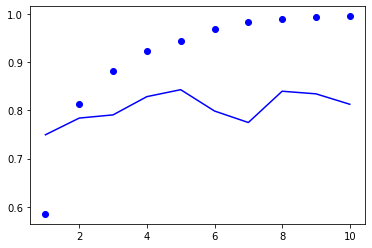

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

#### 在 Keras 中使用 LSTM 層 

Epoch 1/10
157/157 [==============================] - 52s 330ms/step - loss: 0.4856 - acc: 0.7747 - val_loss: 0.3573 - val_acc: 0.8566
Epoch 2/10
157/157 [==============================] - 49s 312ms/step - loss: 0.2823 - acc: 0.8885 - val_loss: 0.2796 - val_acc: 0.8888
Epoch 3/10
157/157 [==============================] - 52s 328ms/step - loss: 0.2336 - acc: 0.9123 - val_loss: 0.2909 - val_acc: 0.8906
Epoch 4/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1956 - acc: 0.9268 - val_loss: 0.3135 - val_acc: 0.8690
Epoch 5/10
157/157 [==============================] - 50s 322ms/step - loss: 0.1725 - acc: 0.9377 - val_loss: 0.2996 - val_acc: 0.8724
Epoch 6/10
157/157 [==============================] - 50s 318ms/step - loss: 0.1551 - acc: 0.9455 - val_loss: 0.3046 - val_acc: 0.8846
Epoch 7/10
157/157 [==============================] - 51s 322ms/step - loss: 0.1431 - acc: 0.9490 - val_loss: 0.3234 - val_acc: 0.8890
Epoch 8/10
157/157 [==============================] - 5

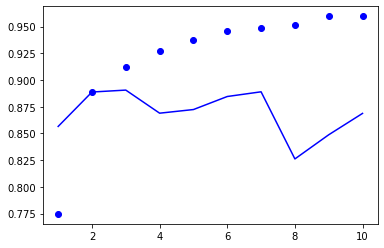

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

## 以 Keras 實現 LSTM

# 循環神經網路的進階用法
* 循環丟棄 (Recurrent dropout)
* 堆疊循環層 (Stacking recurrent layers)
* 雙向循環層 (Bidirectional recurent layers)

## 一般的機器學習方法

## 循環丟棄 (Recurrent dropout)

## 堆疊循環層 (Stacking recurrent layers)

## 雙向循環層 (Bidirectional recurent layers)

# 6-3 使用卷積神經網路進行序列資料處理

#### 檢視耶拿天氣資料集的資料

In [ ]:
import os

data_dir = r'./data/'  # 您的 jena_climate 資料夾路徑
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') # 資料集完整路徑

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)  # 
print(len(header))
print(len(lines))


#### 解析資料

In [ ]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
print(float_data.shape)   # 共有 420551 個時間點的天氣資料, 每個包含 14 種天氣數值

In [ ]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 索引 1 為 temperature 資料
plt.plot(range(len(temp)), temp)
plt.show()

In [ ]:
plt.plot(range(1440), temp[:1440])
plt.show()

## 1D 卷積神經網路

## 結合 CNN 與 RNN 來處理長序列資料